# Contents

1) Importing required libraries
2) Reading Dataset
3) Exploratory Data Analysis
4) Feature Engineering
5) ML Models
6) AutoML
7) Testing
8) Bagging the various results for final submission
9) Appendix

I have submitted other assosiated notebooks where I have tried several other models and combinations. Some interesting details are mentioned in the appendix.

# Importing required libraries 

In [1]:
#Data Wrangling packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Classification Models:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#AutoML models:
from tpot import TPOTClassifier
from supervised.automl import AutoML

# Metrics
from sklearn.metrics import f1_score,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Label Encoder
from sklearn.preprocessing import LabelEncoder

#imputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

#Scalers
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Reading Dataset
The training data has 710 rows and 12 columns.It has a patient ID Column which is ignored. The data is as follows: 

In [2]:
df = pd.read_csv('data/train.csv')
df = df.drop(columns='PatientID')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,52,M,ASY,112,230,0,Normal,160,N,0.0,Up,1
1,51,M,ATA,130,224,0,Normal,150,N,0.0,Up,0
2,57,M,ASY,95,0,1,Normal,182,N,0.7,Down,1
3,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
4,43,M,TA,120,291,0,ST,155,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
715,38,M,NAP,145,292,0,Normal,130,N,0.0,Up,0
716,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
717,41,M,ASY,110,172,0,LVH,158,N,0.0,Up,1
718,61,M,ASY,138,166,0,LVH,125,Y,3.6,Flat,1


It has 11 feature columns and 1 target column('HeartDisease'). The features are:
\begin{itemize}
\item Age: age of the patient in years.
\item Sex: sex of the patient [M: Male, F: Female]
\item ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
\item RestingBP: resting blood pressure [mm Hg]
\item Cholesterol: serum cholesterol [mm/dl]
\item FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
\item RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
\item MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
\item ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
\item Oldpeak: oldpeak = ST[Numeric value measured in depression]
\item STSlope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
\end{itemize}

# Exploratory Data Analysis
EDA is a very important part of data science. A poor dataset can never give good prediction. So, let us first do some data analysis to look at the following.
\begin{itemize}
\item Incorrect, Null or Missing data
\item Categorical and Numerical data
\item Correlated features
\item Outliers
\end{itemize}

In [3]:
#Overvie of the columns
display(df.describe())
display(df.info())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,53.920833,132.804167,196.569444,0.240278,136.091667,0.920000,0.570833
std,9.366327,18.476365,109.500805,0.427549,25.167532,1.081114,0.495301
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.000000,0.000000
25%,48.000000,120.000000,170.750000,0.000000,120.000000,0.000000,0.000000
50%,55.000000,130.000000,222.500000,0.000000,137.000000,0.600000,1.000000
75%,60.000000,140.000000,265.250000,0.000000,154.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             720 non-null    int64  
 1   Sex             720 non-null    object 
 2   ChestPainType   720 non-null    object 
 3   RestingBP       720 non-null    int64  
 4   Cholesterol     720 non-null    int64  
 5   FastingBS       720 non-null    int64  
 6   RestingECG      720 non-null    object 
 7   MaxHR           720 non-null    int64  
 8   ExerciseAngina  720 non-null    object 
 9   Oldpeak         720 non-null    float64
 10  ST_Slope        720 non-null    object 
 11  HeartDisease    720 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 67.6+ KB


None

There is no null values present. Some features are catagorical and some are numeric.\\
Some issues found here:
\begin{itemize}
\item Some cholestrol values are 0 which need to be taken care of.
\item Some values have outliers like cholestrol and OldPeak
\end{itemize}
We will look into the outliers later on but first let us take care of the 0 cholestrol problem. Even before that let us divide the feature space into categorical and numerical features

In [4]:
#Saving the categorical and numeric features
cat_cols = ['Sex','ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope','FastingBS']
num_cols = [ 'Age', 'RestingBP', 'Cholesterol',
              'MaxHR', 'Oldpeak']
y_col = ['HeartDisease']

\textbf{Imputing} <br>
Imputing missing or wrong values should be the first step to data analysis. There are several ways for imputing data like using mean, median or advanced techniques like iterative imputing. Here, I am going to use the KNN-imputer of sklearn. It is still in the experimental process. So I had to activate it before using it. KNN-imputer should give the best values to replace the 0 cholestrols. However before imputing we need to conver the categorical data to numerical data using label encoder. I had tried to use one-hot encoding too but it gave no significant result. In tree type models label encoder and one-hot encoder typically behaves the same.  

In [5]:
#Label Encoder
for col in cat_cols:
    enc  = LabelEncoder()
    df[col] = enc.fit_transform(df[col])

In [6]:
#Impute Values of cholestrol
zero_col_index = df[df['Cholesterol']==0]['Cholesterol'].index
for i in zero_col_index:
    df['Cholesterol'][i] = np.nan

imp = IterativeImputer(random_state=7)
df.iloc[:,:-1] = imp.fit_transform(df.iloc[:,:-1])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,52.0,1.0,0.0,112.0,230.000000,0.0,1.0,160.0,0.0,0.0,2.0,1
1,51.0,1.0,1.0,130.0,224.000000,0.0,1.0,150.0,0.0,0.0,2.0,0
2,57.0,1.0,0.0,95.0,235.615626,1.0,1.0,182.0,0.0,0.7,0.0,1
3,56.0,1.0,0.0,150.0,213.000000,1.0,1.0,125.0,1.0,1.0,1.0,1
4,43.0,1.0,3.0,120.0,291.000000,0.0,2.0,155.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
715,38.0,1.0,2.0,145.0,292.000000,0.0,1.0,130.0,0.0,0.0,2.0,0
716,65.0,1.0,0.0,140.0,306.000000,1.0,1.0,87.0,1.0,1.5,1.0,1
717,41.0,1.0,0.0,110.0,172.000000,0.0,0.0,158.0,0.0,0.0,2.0,1
718,61.0,1.0,0.0,138.0,166.000000,0.0,0.0,125.0,1.0,3.6,1.0,1


\textbf{Correlation}:
Correlated features are a nuisance to training better models. On the other hand features that have no correlation with the target are not needed and can give bad predictions. So, I have found out the following correlations:
\begin{itemize}
\item Using Heatmap - Are the Features Correlated in themselves and by how much ?
\item How much are the features correlated with the target variable ? 
\item Which features have the most correlation with the target variable?
\end{itemize}

------------------------- Heatmap for Correlation coefficients-------------


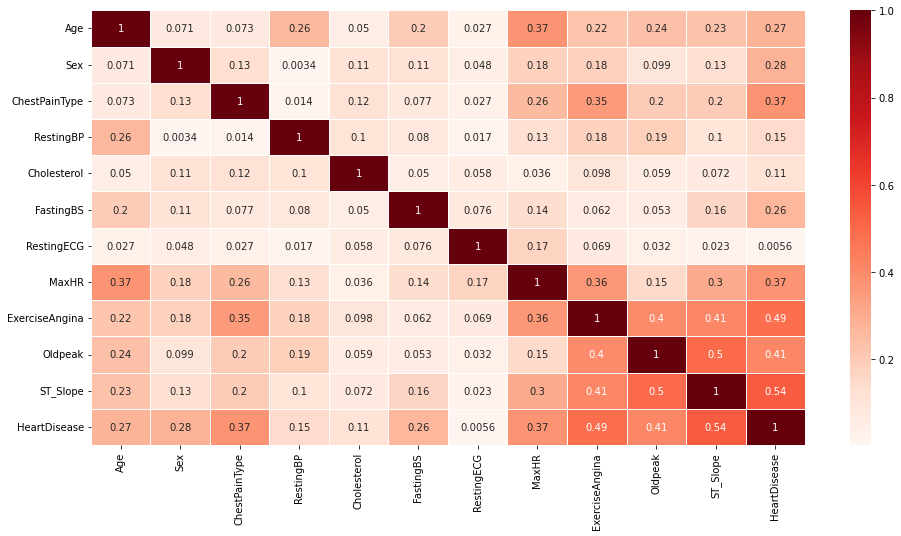

------------------------- Feature's Correlation with target variable-------------
ST_Slope          0.537373
ExerciseAngina    0.489349
Oldpeak           0.408771
MaxHR             0.373400
ChestPainType     0.373294
Sex               0.283186
Age               0.272980
FastingBS         0.264324
RestingBP         0.145215
Cholesterol       0.112433
RestingECG        0.005598
Name: HeartDisease, dtype: float64
----------------- Comapring maimum and minimum correlated features with the taget variable-------------


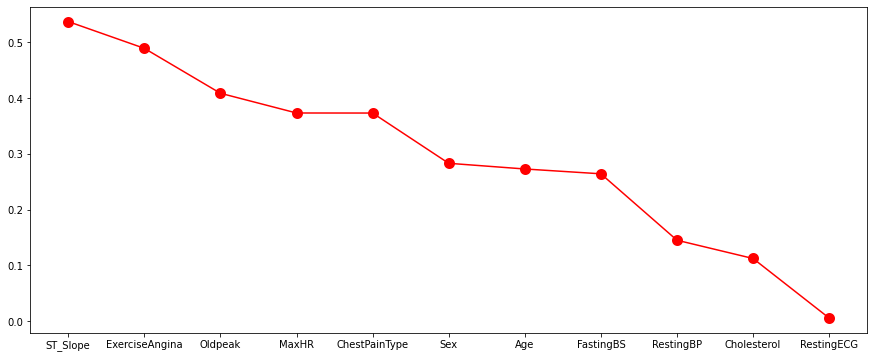

In [7]:
new_df=df
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
print("------------------------- Heatmap for Correlation coefficients-------------")
plt.show()

C=abs(corr["HeartDisease"]).sort_values(ascending=False)[1:]
print("------------------------- Feature's Correlation with target variable-------------")
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
print("----------------- Comapring maimum and minimum correlated features with the taget variable-------------")
plt.show()


\textbf{Reflection on the correlations:}
\begin{itemize}
\item There seems to be not much correlation among the features, which is good. 
\item STSlope has the max correlation with HeartDisease and RestingECG has the least.
\end{itemize}
Based on the above, I decided to take all the features for prediction.

\textbf{Feature Distribution}
Here I try to find out the distribution of the features. Since columns are both numerical and categorical I have used histogram understand the feature distribution.

-----------------------------------------------Categorical Features---------------------------------------------------


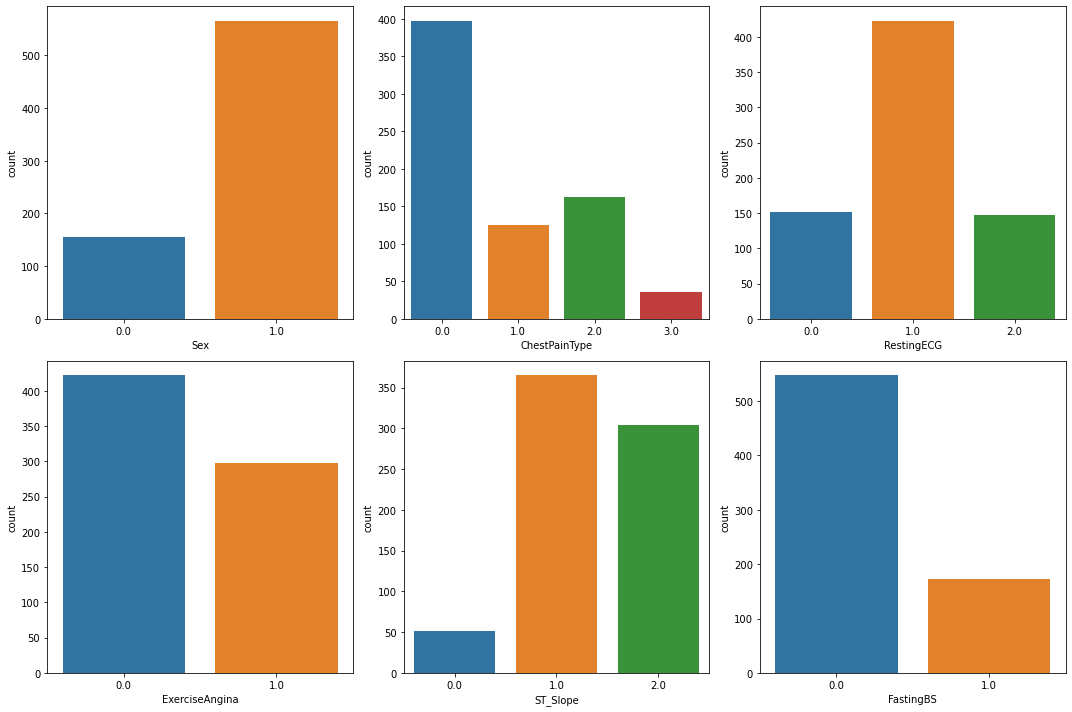

------------------------------------------------Continuous Features---------------------------------------------------


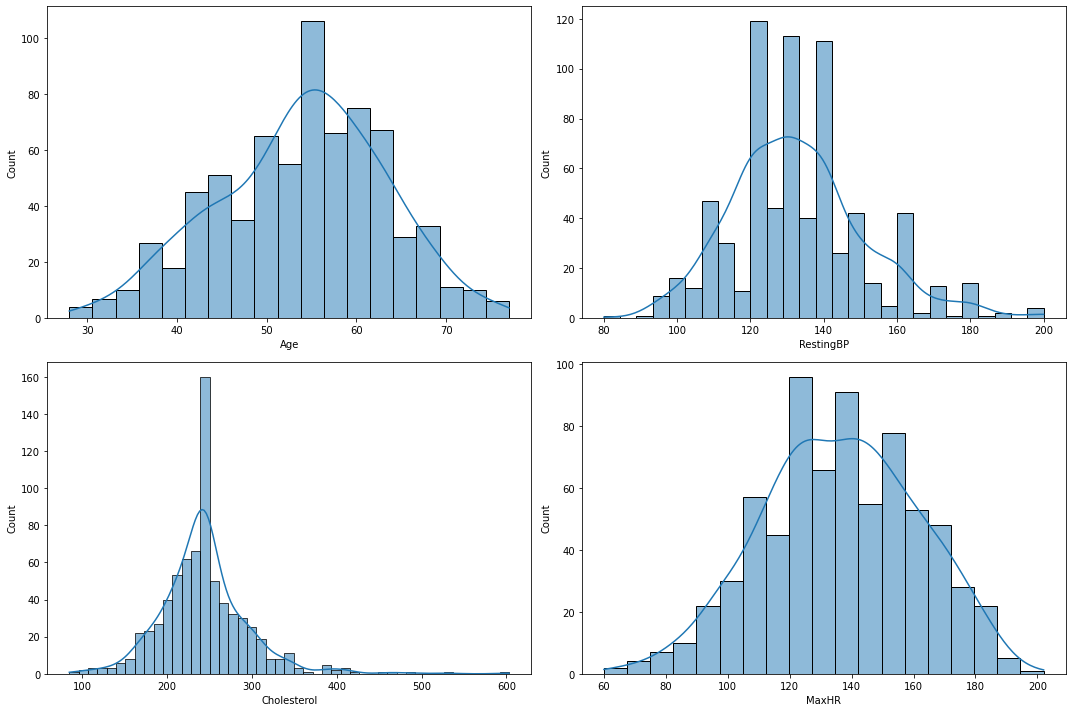

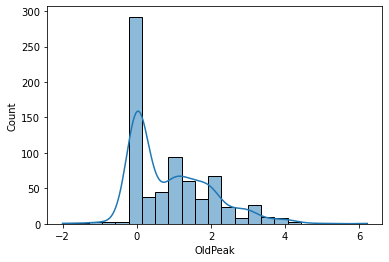

------------------------------------------------Box Plot---------------------------------------------------


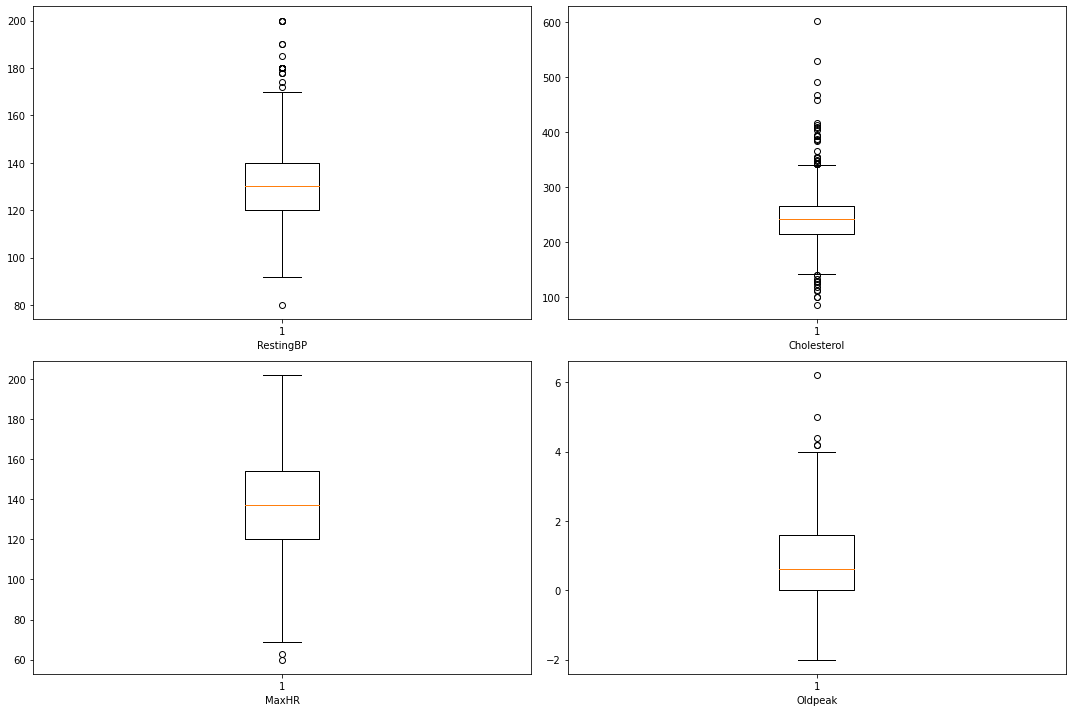

In [8]:
f,a = plt.subplots(2,3,figsize=(15, 10))
a = a.ravel()
print("-----------------------------------------------Categorical Features---------------------------------------------------")
for idx,ax in enumerate(a):
    #ax.hist(df[df.columns[idx]])
    sns.countplot(df[cat_cols[idx]],ax=ax)
    #ax.set_title(titles[idx])
    ax.set_xlabel(cat_cols[idx])
    #ax.set_ylabel(yaxes[idx])
plt.tight_layout()

plt.show()
print("------------------------------------------------Continuous Features---------------------------------------------------")
f,a = plt.subplots(2,2,figsize=(15, 10))
a = a.ravel()
for idx,ax in enumerate(a):
    #ax.hist(df[df.columns[idx]])
    sns.histplot(df[num_cols[idx]],ax=ax,kde=True)
    #ax.set_title(titles[idx])
    ax.set_xlabel(num_cols[idx])
    #ax.set_ylabel(yaxes[idx])
plt.tight_layout()
plt.show()
sns.histplot(df['Oldpeak'],kde=True)
plt.xlabel('OldPeak')
plt.show()
print("------------------------------------------------Box Plot---------------------------------------------------")

f,a = plt.subplots(2,2,figsize=(15, 10))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.boxplot(df[num_cols[idx+1]])
    #ax.set_title(titles[idx])
    ax.set_xlabel(num_cols[idx+1])
    #ax.set_ylabel(yaxes[idx])
plt.tight_layout()
plt.show()

\textbf{Reflection on the Distributions}
\begin{itemize}
\item Most continuous features are normally distributed except OldPeak which is right skewed.
\item Cholestrol,OldPeak and RestingBP seem to have outliers.
\item There seems to be some imbalance in the categorical features for ChestPainType and STSlope.
\end{itemize}
The distribution seems to be okay for now.

\textbf{Class Imbalance}
There seems to be some imbalance between the two classes but it is not major so canbe ignored.

In [9]:
df['HeartDisease'].value_counts()

1    411
0    309
Name: HeartDisease, dtype: int64

\textbf{Outliers}
Then I found out the outliers in the continuous columns.

In [10]:
continuous_data=df[num_cols]
print("---------- no. of outliers in Column:-----------")
for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("{} : {} => {}%".format(k,len(v_col),round((perc),3)))

---------- no. of outliers in Column:-----------
Age : 4 => 0.556%
RestingBP : 36 => 5.0%
Cholesterol : 40 => 5.556%
MaxHR : 3 => 0.417%
Oldpeak : 12 => 1.667%


Following are the positions of some outliers 

In [11]:
#Display the position of outliners.
print("Outliners Present at position: \n")
print("RestingBP: {}".format(np.where(df['RestingBP']>180)))
print("Cholesterol: {}".format(np.where(df['Cholesterol']>500)))
print("MaxHR: {}".format(np.where(df['MaxHR']>200)))
print("Oldpeak: {}".format(np.where(df['Oldpeak']>4)))

Outliners Present at position: 

RestingBP: (array([ 69, 294, 317, 366, 470, 563, 610]),)
Cholesterol: (array([ 83, 704]),)
MaxHR: (array([686]),)
Oldpeak: (array([103, 164, 388, 472, 527]),)


Some sources have used log transformation to remove the outliers. However I did not find the importance to do so because the outlier values were within the possible values for humans.

I also tried pairplot for continuous features

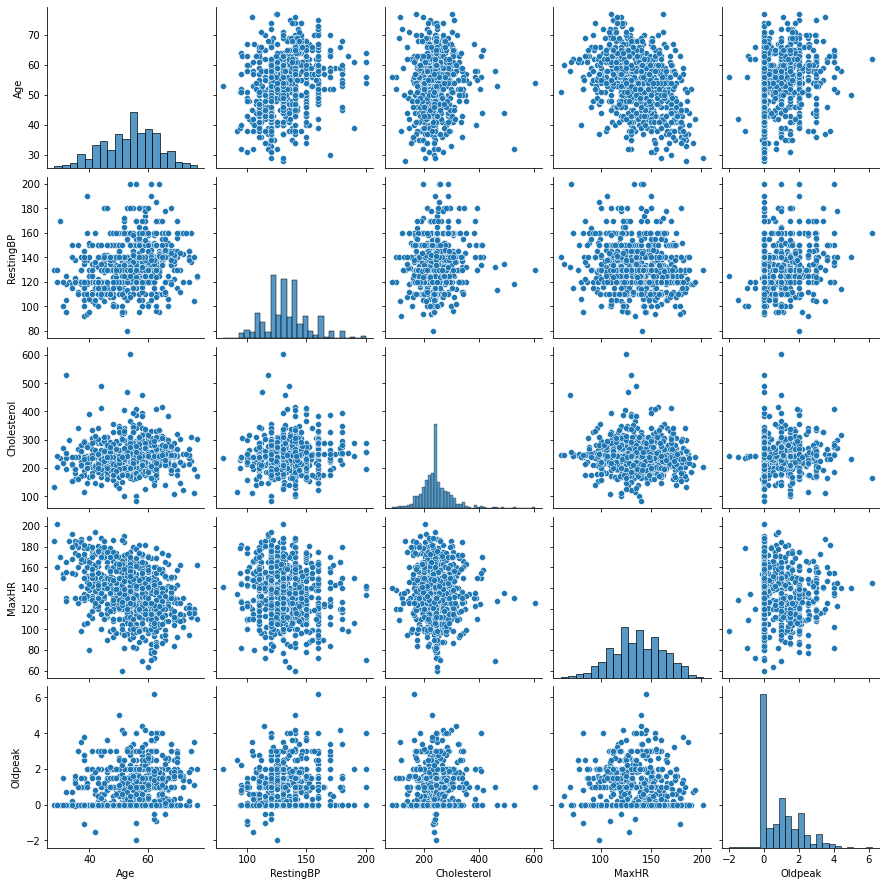

In [12]:
sns.pairplot(df[num_cols])
plt.show()

None of the features seem to be highly correlated.

# Male vs Female
At first I felt that sex can not detemine if someone gets a heart attack and was tempted to drop it but reading some materials online I found out that male are more likely to get heart attacks than female. Let us find out if the data says so.

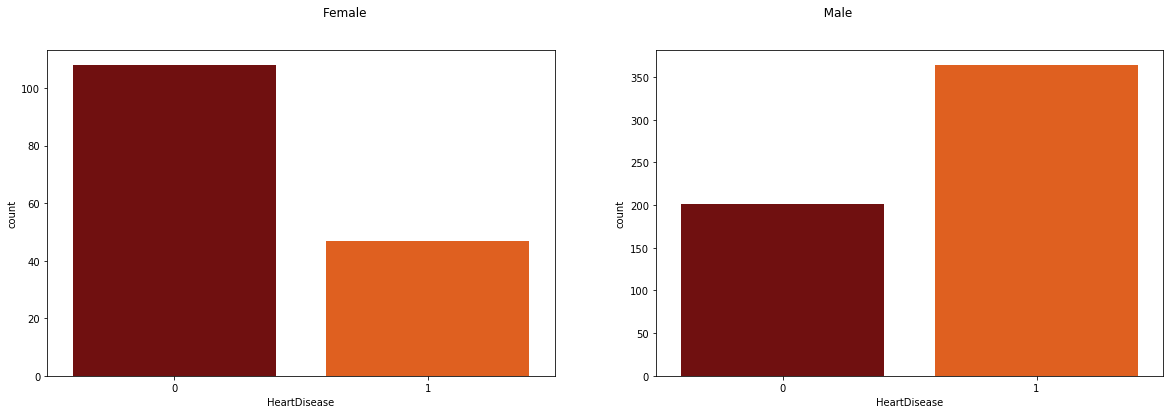

In [13]:
male = df[df["Sex"]==1.0].reset_index()
female = df[df["Sex"]==0].reset_index()
fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female                                                                                                                      Male")
sns.countplot("HeartDisease", data=female, palette='gist_heat',ax=ax1[0])
sns.countplot("HeartDisease", data=male, palette='gist_heat',ax=ax1[1])
fig.show()

It clearly shows that the probablity of having a heart attach is much higher for male.

# Feature Engineering

Split the data into X(features) and y(target).

In [14]:
X = df.drop(['HeartDisease'],axis=1)
y = df[['HeartDisease']]

\textbf{One-Hot Encoding}
Tried out one-hot-encoding for the categorical features. But Label encoders gave much better prediction than one hot encoding

In [15]:
#X = pd.get_dummies(X,columns=cat_cols)

\textbf{Scaling}:
Since dataset has different ranges for features, scaling is required. We use RobustScaler as it deals with outliers. It performs better than StandardScaler and MinMaxScaler

In [16]:
# instantiating the scaler
scaler = RobustScaler()
#scaler = StandardScaler()

# scaling the continuous featuree
X[num_cols] = scaler.fit_transform(X[num_cols])

\textbf{Train-Test Split}

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 21)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (612, 11)
The shape of X_test is        (108, 11)
The shape of y_train is       (612, 1)
The shape of y_test is        (108, 1)


# ML Models
I have used GridSearchCV to tune hyperparameters.

\textbf{SVM}

The best params are : {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}
The Test f1 score of SVM after hyper-parameter tuning is  0.8503937007874016


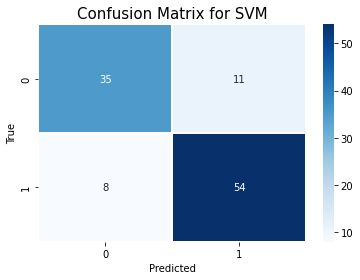

In [18]:
# SVM
svm = SVC()

params = {"kernel":['linear','rbf'],'C': [0.1, 1, 10, 100, 1000],'gamma':[0.001,0.005,0.01,0.05,0.1,0.5]}

model_svm = GridSearchCV(svm, params, refit = True,n_jobs=-1)

model_svm.fit(X_train,np.array(y_train).ravel())

# the scores
print("The best params are :", model_svm.best_params_)

# predicting the values
y_pred = model_svm.predict(X_test)

print("The Test f1 score of SVM after hyper-parameter tuning is ", f1_score(y_test, y_pred))
    
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, cmap='Blues', linewidths=2)
plt.title(f'Confusion Matrix for SVM', fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

The test f1 score of Logistic Regression is  0.7903225806451614


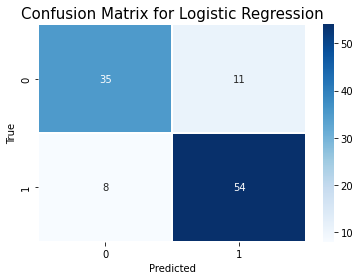

In [19]:
#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
print("The test f1 score of Logistic Regression is ", f1_score(y_test, y_pred_lr))

    
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, cmap='Blues', linewidths=2)
plt.title(f'Confusion Matrix for Logistic Regression', fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

\textbf{Tree Based Models}
I did not use simple Decision Tee models as Random Forests use bagging methods which are much better than naive Decision trees

The best params are : {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 100}
The f1 score of Random Forest after hyper-parameter tuning is  0.8730158730158729


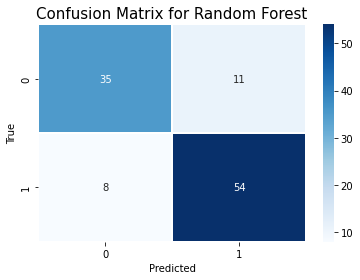

In [20]:
#RandomForest
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3,5],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [8, 10, 12,14,16],
    'n_estimators': [10,100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
model_rf = GridSearchCV(estimator = rf, param_grid = params,
                          cv = 3, n_jobs = -1)

model_rf.fit(X_train, np.array(y_train).ravel())

print("The best params are :", model_rf.best_params_)

# predicting the values
y_pred_rf = model_rf.predict(X_test)

print("The f1 score of Random Forest after hyper-parameter tuning is ", f1_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, cmap='Blues', linewidths=2)
plt.title(f'Confusion Matrix for Random Forest', fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
The best params are : {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 130}
The best score is   : 0.8611088897774224
The f1 score of XGBoost after hyper-parameter tuning is  0.848


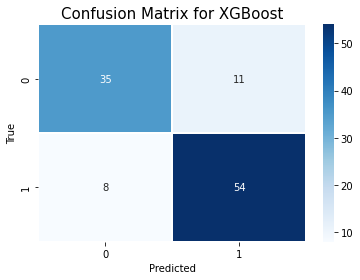

In [21]:
#XGBoost
params = {
    'max_depth': range (1, 10, 1),
    'n_estimators': range(10, 220, 40),
    'learning_rate': [0.5,0.1, 0.01, 0.05,0.005]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=-1,
    seed=42
)
model_xb = GridSearchCV(
    estimator=estimator,
    param_grid=params,
    n_jobs = -1,
    cv = 5,
    verbose=True
)
model_xb.fit(X_train, np.array(y_train).ravel())

print("The best params are :", model_xb.best_params_)
print("The best score is   :", model_xb.best_score_)

# predicting the values
y_pred_xb = model_xb.predict(X_test)

print("The f1 score of XGBoost after hyper-parameter tuning is ", f1_score(y_test, y_pred_xb))

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, cmap='Blues', linewidths=2)
plt.title(f'Confusion Matrix for XGBoost', fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AutoML
I tried two auto-MLs : TPOT and MLjar. Since it is impossible to sit and try for each hyperparameters, AutoML provide much poerful tools do to it in a automated pipeline. They are the ones that are ussed to achieve >0.91 f1 score.


In [ ]:
pipeline_optimizer = TPOTClassifier()
pipeline_optimizer = TPOTClassifier(verbosity=2, generations = None, population_size = 100,max_time_mins=60,scoring='f1',n_jobs=-1,cv=5)
pipeline_optimizer.fit(X, y)

In [20]:
print("The f1 score ", f1_score(y, pipeline_optimizer.predict(X)))

The f1 score  0.9239904988123515


In [ ]:
automl = AutoML(total_time_limit = 39600 , mode = 'Compete', eval_metric='f1',random_state = 7)
automl.fit(X, y)
print("The f1 score ", f1_score(y, automl.predict(X)))

MLjar gave much higher training accuracy. It gave a training f1 score of over 0.95.

# Testing

In [22]:
testDF = pd.read_csv('data/test_X.csv')
ID = testDF['PatientID']
testDF = testDF.drop(columns='PatientID')
testDF

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up
1,59,M,NAP,130,318,0,Normal,120,Y,1.0,Flat
2,58,M,ASY,110,198,0,Normal,110,N,0.0,Flat
3,38,F,ATA,120,275,0,Normal,129,N,0.0,Up
4,55,F,ATA,135,250,0,LVH,161,N,1.4,Flat
...,...,...,...,...,...,...,...,...,...,...,...
193,60,M,ASY,130,186,1,LVH,140,Y,0.5,Flat
194,52,F,NAP,136,196,0,LVH,169,N,0.1,Flat
195,37,M,ASY,130,315,0,Normal,158,N,0.0,Up
196,64,M,ASY,120,0,1,ST,106,N,2.0,Flat


Need to follow the same pipeline of data preprocessing for test data. 

Imputing the values with zero cholestrol:

In [24]:
zero_col_index = testDF[testDF['Cholesterol']==0]['Cholesterol'].index
for i in zero_col_index:
    testDF['Cholesterol'][i] = np.nan
    
for col in cat_cols:
    enc  = LabelEncoder()
    testDF[col] = enc.fit_transform(testDF[col])
    
testDF = imp.transform(testDF)

Saving the Final predictions

In [ ]:
testY = automl.predict(testDF)
output = pd.DataFrame({'PatientID':ID, 'HeartDisease' : testY})
output.to_csv('submission11.csv',index= False)

# Bagging the various results for final submission

In [26]:
output1 = pd.read_csv('submission1.csv')
output2 = pd.read_csv('submission2.csv')
output3 = pd.read_csv('submission3.csv')
output4 = pd.read_csv('submission4.csv')
output6 = pd.read_csv('submission6.csv')
output7 = pd.read_csv('submission7.csv')
output8 = pd.read_csv('submission8.csv')
output9 = pd.read_csv('submission9.csv')
output10 = pd.read_csv('submission10.csv')
output11 = pd.read_csv('submission11.csv')

In [32]:
average_output = (output1['HeartDisease'] + output2['HeartDisease'] + output3['HeartDisease'] +
                  output4['HeartDisease'] + output6['HeartDisease'] + output7['HeartDisease'] +
                  output8['HeartDisease'] + output9['HeartDisease'] + output10['HeartDisease'] +
                  output11['HeartDisease'])/10
average_output = np.where(average_output<0.5,0,1)
                        
avg_output = pd.DataFrame({'PatientID':ID, 'HeartDisease' : average_output})
avg_output.to_csv('submission12.csv',index= False)        

This step really boosted my results. Since various models are generated from various random conditions, hyperparams, autoMls, a bagged submission is bound to outperform all.

# References

1) https://www.kaggle.com/code/abhinavgargacb/heart-attack-eda-predictor-95-accuracy-score#Model-Development                 
2) https://www.kaggle.com/code/advikmaniar/heart-attack-eda-prediction-with-9-model-95#%22Age%22-EDA


# Appendix

Total Models tried:

1) Linear
2) Decision Tree
3) LightGBM
4) Xgboost
5) Catboost
6) Neural Networks
7) RandomForest
8) ExtraTrees
9) NearestNeighbour

The Automl has found out some golden features. The golden features (in order of train dataset):

1)        "feature_9_diff_feature_11",
2)        "feature_11_sum_feature_3",
3)        "feature_6_diff_feature_11",
4)        "feature_3_diff_feature_9",
5)        "feature_2_ratio_feature_11",
6)        "feature_11_ratio_feature_2",
7)        "feature_11_multiply_feature_2",
8)        "feature_3_diff_feature_6",
9)        "feature_9_sum_feature_6",
10)       "feature_4_multiply_feature_3"

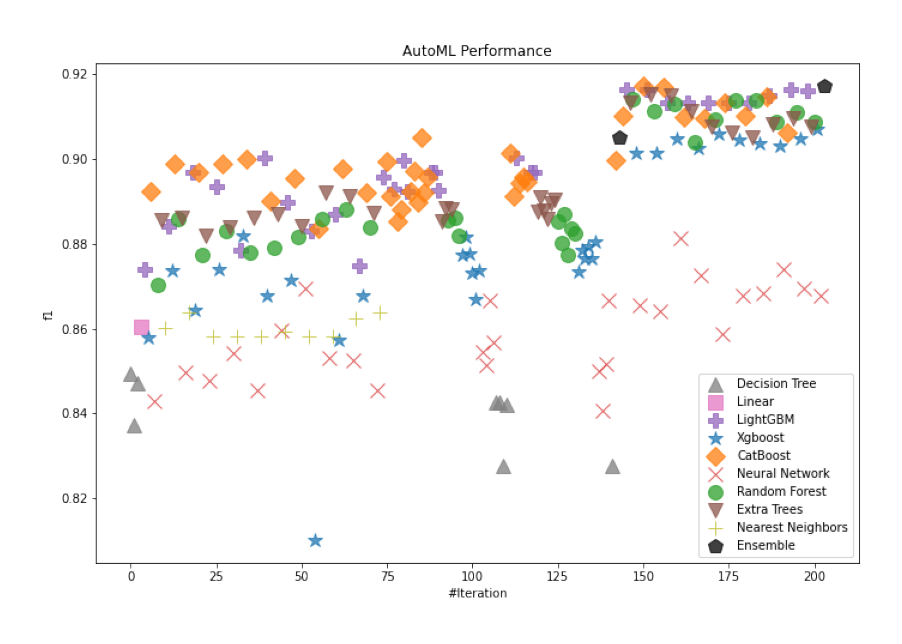

In [11]:
import matplotlib.image as img
plt.figure(dpi=200)
im = img.imread('AutoML_1/ldb_performance.png')
plt.axis('off')
plt.imshow(im)
plt.show()

This figure shows the different models that have been tried by the AutoML and their ensembles with every iterations, trying to get th best. It can get the best f1 validation score of nearly 0.92.

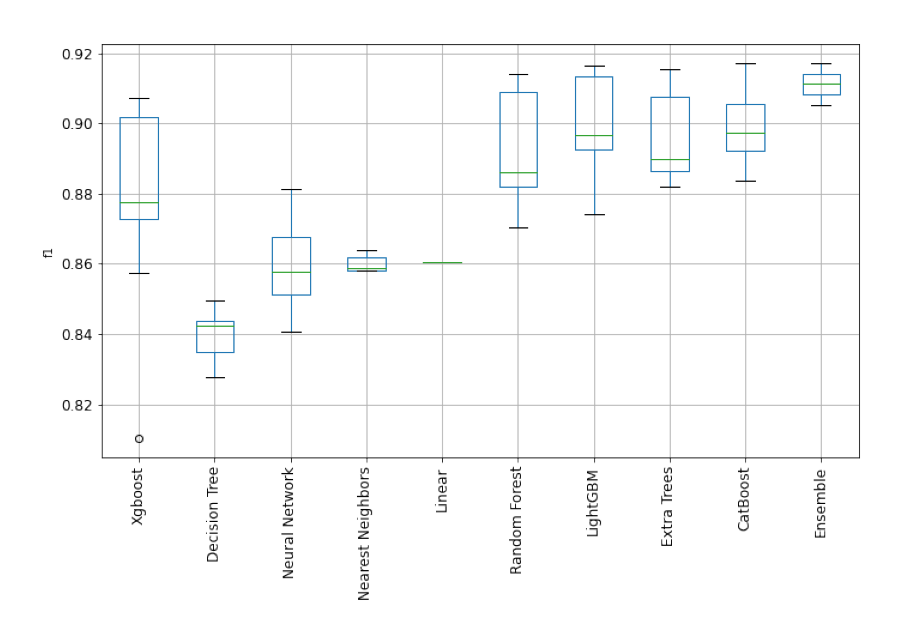

In [12]:
plt.figure(dpi=200)
im = img.imread('AutoML_1/ldb_performance_boxplot.png')
plt.axis('off')
plt.imshow(im)
plt.show()

This figure shows that the ensemble model of all the combinations get an average f1 of 0.91 (with minimum also above 0.9) 

Training time:

1) TPOT AutoML : Training time of 12 hours on a 48 core CPU. 
2) MLjar : training time of 2 hours on a 48 core CPU